# Used Car Asking Price Predicition for the Indian Market 
## Explanatory Data Analysis
## Finding the Best Predictive Model

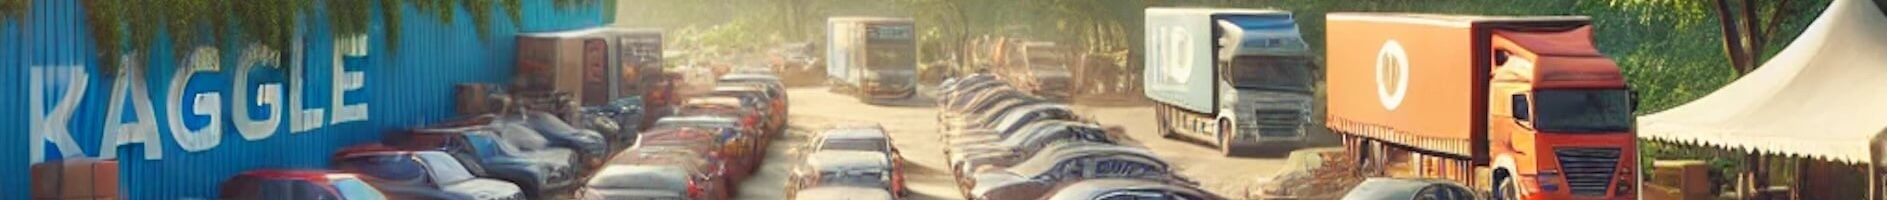

### **Table of Contents**
* [<span style="color:#A690A4"> 0. Executive Summary](#exe_sum)
* [<span style="color:#A690A4"> 1. Introduction](#intro)
* [<span style="color:#A690A4"> 2. Collect, Wrangle & Explore Data](#process)
* [<span style="color:#A690A4"> 3. Predict Asking Price](#predict)
* [<span style="color:#A690A4"> 4. Conclusion](#conclusion)

---

# <span style="color:#5E6997">Executive Summary</span> <a class="anchor" id="exe_sum"></a>

This project focuses on analyzing and predicting the asking prices of used cars in the Indian market using machine learning models. By leveraging a dataset with almost 10,000 entries, this notebook explores key price-determining factors, evaluates multiple predictive models, and identifies the best-performing approach for accurate price estimation.

#### Objective:
To develop a robust predictive framework that estimates used car prices based on features such as brand, model, mileage, car age, ownership history, and transmission type. The insights and models aim to support informed decision-making for buyers, sellers, and market analysts.

---

#### Methodology:
1. **Data Exploration and Preparation**:
   - Cleaned and transformed the dataset to address inconsistencies, missing values, and outliers.
   - Engineered key features to improve predictive power.

2. **Exploratory Data Analysis (EDA)**:
   - Identified trends, such as price depreciation with age and mileage, and brand-level price variations.
   - Detected correlations between features and target variables to inform model selection.

3. **Modeling Techniques**:
   - Implemented and compared the following machine learning models:
     - **Linear Regression**: Provided a baseline with poor accuracy which struggled with non-linear relationships.
     - **Decision Trees**: Improved interpretability but prone to overfitting.
     - **Random Forests**: Balanced accuracy and robustness through ensemble learning.
     - **Gradient Boosting (XGBoost/LightGBM)**: Delivered competitive results, effectively capturing complex patterns in the data.
     - **CatBoost Model**: Delivered the **best results**. Provided fast training, high accuracy, was robust against overfitting, and worked well with both classification and regression tasks.
     - **Tensorflow**: Performed adequately, but ultimatley suffered from not enough rows of data for training purposes.

4. **Evaluation Metrics**:
   - Metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) were used to assess model performance.
   - Gradient Boosting emerged as the top-performing model, offering the lowest error rates and the best generalization of the models tested.

---

#### Key Results:
- **Feature Insights**:
  - Brand (Target Encoded), model (Target Encoded), and Brand*model consistently impacted price, with premium brands retaining value better than others.
  - Other influential features were car year, mileage (km driven), fuel type, transmission, and ownership history.

- **Model Performance**:
  - **CatBoost**: Achieved the **highest accuracy**, balancing bias and variance effectively. **Cross-Validation Mean RMSE = 282,056 (₹). Cross-Validation Standard Deviation of RMSE = 9,053 (₹). Test RMSE = 299,303 (₹).**
  - **XGBoost**: Runner up model with Cross-Validation RMSE: 294,915 (₹), Test RMSE: 310,854 (₹).
  - **Random Forests**: Performed well but was slightly outclassed by Gradient Boosting in capturing subtle patterns.
  - **Decision Trees**: Had competitive results but were less robust compared to ensemble methods.
  - **Linear Regression**: Served as a baseline but lacked the capacity to model complex relationships.

---

#### Recommendations:
1. **For Buyers**: Use predictions to identify fair price ranges and negotiate effectively.
2. **For Sellers**: Leverage insights to set competitive prices, factoring in depreciation, mileage, and ownership history.
3. **For Market Analysts**: Employ the Gradient Boosting model to monitor price trends and predict shifts in the used car market.

---

#### Conclusion:
This notebook demonstrates the power of machine learning in predicting used car prices. Gradient Boosting emerged as the most effective model for this dataset. Future enhancements could include integrating more features (e.g., insurance history, accident records), gaining more rows of data for the dataset, and experimenting with deep learning models to push predictive boundaries further.

---

# <span style="color:#5E6997">Introduction</span> <a class="anchor" id="intro"></a>

### Notebook Introduction

This notebook focuses on analyzing and predicting used car prices in the Indian market. Leveraging a dataset containing detailed information about 9,582 used cars, it aims to uncover insights and build models to estimate the asking price of vehicles based on factors such as brand, model, year, mileage, transmission type, ownership history, and fuel type.

#### Key Features of the Notebook:
1. **Objective**: The primary goal of the notebook is to evaluate and determine the most effective predictive model for used car pricing in India.
2. **Exploratory Data Analysis (EDA)**:
   - It includes a comprehensive examination of the dataset's features to understand trends, relationships, and outliers.
   - Features like model, brand, mileage (km driven), car age, and owner type are crucial for pricing strategies.
3. **Predictive Modeling**:
   - Implements and compares multiple machine learning models to identify the best one for price prediction.
   - Techniques such as regression, decision trees, and advanced algorithms like gradient boosting are employed.
4. **Visualizations**:
   - Uses Seaborn visual tools to display relationships, trends, and model performance metrics effectively.

#### Dataset Overview:
The dataset consists of 11 columns:
- **Brand & Model**: The manufacturer and specific variant of the car.
- **Year & Age**: Manufacturing year and car age in years.
- **kmDriven**: Total distance covered, indicating wear and tear.
- **Transmission**: Gearbox type (Manual or Automatic).
- **Owner**: Ownership history (e.g., first owner, second owner).
- **FuelType**: Type of fuel used (Petrol, Diesel, etc.).
- **PostedDate**: Listing date of the car.
- **AdditionInfo**: Additional details about the car's condition.
- **AskPrice**: The asking price of the car.

#### Purpose of the Notebook:
This notebook bridges the gap between data analysis and actionable insights. By refining predictions of car prices, it supports better decision-making for buyers and sellers in the Indian used car market.

---

# <span style="color:#5E6997">Collect, Wrangle, and Explore</span> <a class="anchor" id="process"></a>

## Load the Dataset

Load the dataset and look at the first few rows of data.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('/kaggle/input/used-car-dataset/used_car_dataset.csv')
df.head()

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice
0,Honda,City,2001,23,"98,000 km",Manual,second,Petrol,Nov-24,"Honda City v teck in mint condition, valid gen...","₹ 1,95,000"
1,Toyota,Innova,2009,15,190000.0 km,Manual,second,Diesel,Jul-24,"Toyota Innova 2.5 G (Diesel) 7 Seater, 2009, D...","₹ 3,75,000"
2,Volkswagen,VentoTest,2010,14,"77,246 km",Manual,first,Diesel,Nov-24,"Volkswagen Vento 2010-2013 Diesel Breeze, 2010...","₹ 1,84,999"
3,Maruti Suzuki,Swift,2017,7,"83,500 km",Manual,second,Diesel,Nov-24,Maruti Suzuki Swift 2017 Diesel Good Condition,"₹ 5,65,000"
4,Maruti Suzuki,Baleno,2019,5,"45,000 km",Automatic,first,Petrol,Nov-24,"Maruti Suzuki Baleno Alpha CVT, 2019, Petrol","₹ 6,85,000"


Let's see the total number of rows and columns.

In [2]:
df.shape

(9582, 11)

Ok. 9582 rows and 11 columns. Let's see if there are have any missing values in this table.

## Remove Rows with Missing Values

In [3]:
df.info()       # Information about columns, data types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


All of the features except 'kmDriven' are complete.

How many values are missing?

In [4]:
# Count missing values in 'kmDriven'
missing_values = df.kmDriven.isna().sum()

# Display the result
print(f'The kmDriven feature is missing {missing_values} values')

The kmDriven feature is missing 47 values


Let's see the rows with missing kmDriven and see if there are any similarities/trends between the entries.

In [5]:
# Show rows where column kmDriven has missing values
rows_with_missing = df[df['kmDriven'].isna()]

# Display the result
print(rows_with_missing)

              Brand              model  Year  Age kmDriven Transmission  \
231   Maruti Suzuki           Alto-800  2019    5      NaN       Manual   
353          Toyota             Innova  2016    8      NaN       Manual   
444           Honda            City ZX  2024    0      NaN    Automatic   
476         Hyundai        Santro Xing  2010   14      NaN    Automatic   
608          Toyota              Etios  2012   12      NaN       Manual   
793           Skoda             Kushaq  2010   14      NaN    Automatic   
976        Mahindra    Bolero Neo Plus  2015    9      NaN    Automatic   
1164       Mahindra         Bolero Neo  2023    1      NaN       Manual   
1199           Tata             Indica  2014   10      NaN       Manual   
1413        Hyundai        Santro Xing  2007   17      NaN       Manual   
1978           Tata          Tiago Nrg  2021    3      NaN    Automatic   
2680  Maruti Suzuki         Zen-Estilo  2008   16      NaN    Automatic   
2847  Maruti Suzuki      

I'm seeing a lot of 'Maruti Suzuki' entries. I wonder how common this Brand is in India? There are a few rows with this value for Brand in the rows with missing prices. Let's see how many rows have 'Maruti Suzuki' as the Brand in the whole dataset.

In [6]:
# Count rows where model has the value "Maruti Suzuki"
rows_count = (df['Brand'] == 'Maruti Suzuki').sum()
rows_count

2720

OK! That's quite a few considering there are less than 10,000 entries in this dataset. I don't think I need to worry too much about the large representation of 'Maruti Suzuki' branded cars in the rows with missing prices.

## Clean Data

Next, let's remove the rows with missing 'kmDriven' values. I will also clean up the 'kmDriven' and convert it to an integer datatype.

In [7]:
#  Clean up the kmDriven text
df["kmDriven"] = (
    df["kmDriven"]
    .str.replace(",", "", regex=False)
    .str.replace(" km", "", regex=False)
    .astype(float)  # Convert to float
)

# Drop rows with NaN in kmDriven
df = df.dropna(subset=["kmDriven"])

# Convert to integer
df["kmDriven"] = df["kmDriven"].astype(int)

Let's also clean up AskPrice.

In [8]:
#  Clean up the AskPrice text
df["AskPrice"] = (
    df["AskPrice"]
    .str.replace(",", "", regex=False)
    .str.replace("₹", "", regex=False)
    .astype(float)  # Convert to float
)

# Convert to integer
df["AskPrice"] = df["AskPrice"].astype(int)

Let's verify that 'kmDriven' and 'AskPrice' are integers now.I can also verify that the rows with missing values have been removed.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9535 non-null   object
 1   model         9535 non-null   object
 2   Year          9535 non-null   int64 
 3   Age           9535 non-null   int64 
 4   kmDriven      9535 non-null   int64 
 5   Transmission  9535 non-null   object
 6   Owner         9535 non-null   object
 7   FuelType      9535 non-null   object
 8   PostedDate    9535 non-null   object
 9   AdditionInfo  9535 non-null   object
 10  AskPrice      9535 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 893.9+ KB


Indeed they are integers now. Rows with missing values have also been removed successfully.

## Find Categorical Data

Now I need to look at some of these features and determine the categorical data in them, and how I will need to encode them.

Here are the unique values in each feature. This should give us an indication of which features are categorical.

In [10]:
unique_counts = df.nunique(dropna=False)

# Display the result
print(unique_counts)

Brand             38
model            398
Year              32
Age               32
kmDriven        1745
Transmission       2
Owner              2
FuelType           3
PostedDate        12
AdditionInfo    7270
AskPrice        1326
dtype: int64


It looks like I need to consider the features "Brand", "Model", "Transmission", "Owner", and "FuelType" for encoding.

Let's start by ensuring there are no accidental duplicate entries in "Brand" due to typos.

In [11]:
# Show unique values of Brand
unique_brands = sorted(df["Brand"].unique())

# Display the result
print(unique_brands)

['Ambassador', 'Ashok', 'Aston Martin', 'Audi', 'BMW', 'Bajaj', 'Bentley', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'MG', 'Mahindra', 'Maruti Suzuki', 'Maserati', 'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Opel', 'Porsche', 'Renault', 'Rolls-Royce', 'Skoda', 'Ssangyong', 'Tata', 'Toyota', 'Volkswagen', 'Volvo']


Good. They are all unique brands.

Let's check for typos in Year and Age.

In [12]:
# Show unique values of Year
unique_years = sorted(df["Year"].unique())

# Display the result
print(unique_years)

[1986, 1990, 1994, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


In [13]:
# Show unique values of Age
unique_ages = sorted(df["Age"].unique())

# Display the result
print(unique_ages)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 34, 38]


No typos.

Now let's check the unique values of Transmission, Owners, and FuelType.

In [14]:
# Show unique values of Transmission
unique_transmissions = sorted(df["Transmission"].unique())

# Display the result
print(unique_transmissions)

['Automatic', 'Manual']


In [15]:
# Show unique values of Owner
unique_owners = sorted(df["Owner"].unique())

# Display the result
print(unique_owners)

['first', 'second']


In [16]:
# Show unique values of FuelType
unique_fuel_types = sorted(df["FuelType"].unique())

# Display the result
print(unique_fuel_types)

['Diesel', 'Hybrid/CNG', 'Petrol']


These are indeed categorical features.

I am also curious about the unique values of the PostedDate, and if multiple years are present in these values. If so, it could be a good value to use in conjunction with Year to determine specific age of the car at the time of listing.

In [17]:
# Show unique values of PostedDate
unique_posted_dates = sorted(df["PostedDate"].unique())

# Display the result
print(unique_posted_dates)

['Apr-24', 'Aug-24', 'Dec-23', 'Feb-24', 'Jan-24', 'Jul-24', 'Jun-24', 'Mar-24', 'May-24', 'Nov-24', 'Oct-24', 'Sep-24']


It looks like the range of of PostedDates only spans a year, so I do not need to consider this feature for the model.

**Columns to be dropped from the dataset:**
* AdditionalInfo - Despite the high score, this contains redundant information found elsewhere in the dataset.
* Age - Essentially contains the same information as 'Year'.
* PostedDate - Has insignificant contributions to the target.

In [18]:
df = df.drop(columns=['AdditionInfo', 'PostedDate', 'Age'])

**Columns needing more research:**
* Transmission
* FuelType
* Owner

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9535 entries, 0 to 9581
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9535 non-null   object
 1   model         9535 non-null   object
 2   Year          9535 non-null   int64 
 3   kmDriven      9535 non-null   int64 
 4   Transmission  9535 non-null   object
 5   Owner         9535 non-null   object
 6   FuelType      9535 non-null   object
 7   AskPrice      9535 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 670.4+ KB


In [20]:
df.head()

,Brand,model,Year,kmDriven,Transmission,Owner,FuelType,AskPrice
0,Honda,City,2001,98000,Manual,second,Petrol,195000
1,Toyota,Innova,2009,190000,Manual,second,Diesel,375000
2,Volkswagen,VentoTest,2010,77246,Manual,first,Diesel,184999
3,Maruti Suzuki,Swift,2017,83500,Manual,second,Diesel,565000
4,Maruti Suzuki,Baleno,2019,45000,Automatic,first,Petrol,685000


## Visualizations

### Plot of the Average AskPrice by Transmission Type

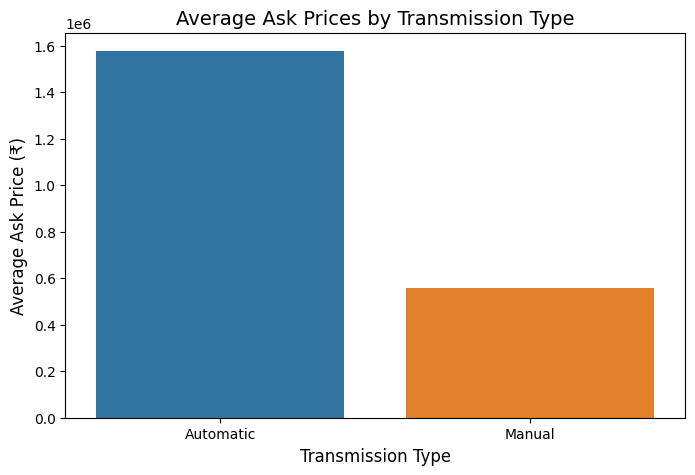

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by transmission type and calculate average price
price_trends_by_transmission = (
    df.groupby('Transmission')['AskPrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by transmission
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_transmission, 
    x='Transmission', 
    y='AskPrice'
)
plt.title('Average Ask Prices by Transmission Type', fontsize=14)
plt.xlabel('Transmission Type', fontsize=12)
plt.ylabel('Average Ask Price (₹)', fontsize=12)

plt.show()

Wow! There is a BIG difference between Automatic and Manual Transmission types. I will keep this feature.

### Plot of the Average Ask Price by Owner Type

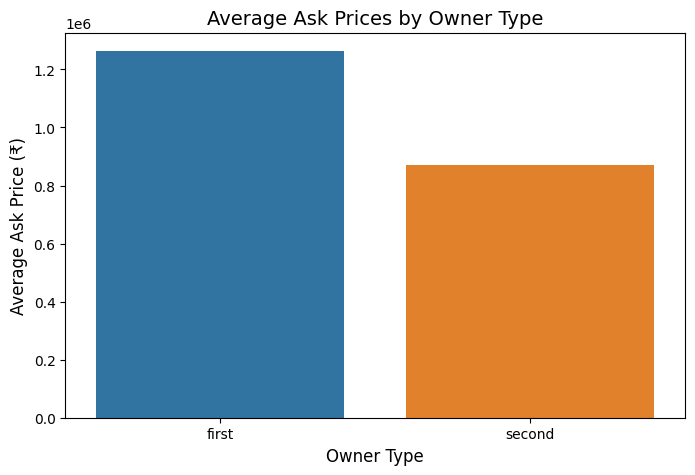

In [22]:
# Group by owner type and calculate average price
price_trends_by_owner = (
    df.groupby('Owner')['AskPrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by owner
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_owner, 
    x='Owner', 
    y='AskPrice'
)
plt.title('Average Ask Prices by Owner Type', fontsize=14)
plt.xlabel('Owner Type', fontsize=12)
plt.ylabel('Average Ask Price (₹)', fontsize=12)

plt.show()

There is a significant difference in the AskPrice for first and second owners. I will also keep this feature.  

### Plot of the Average AskPrice by Fuel Type

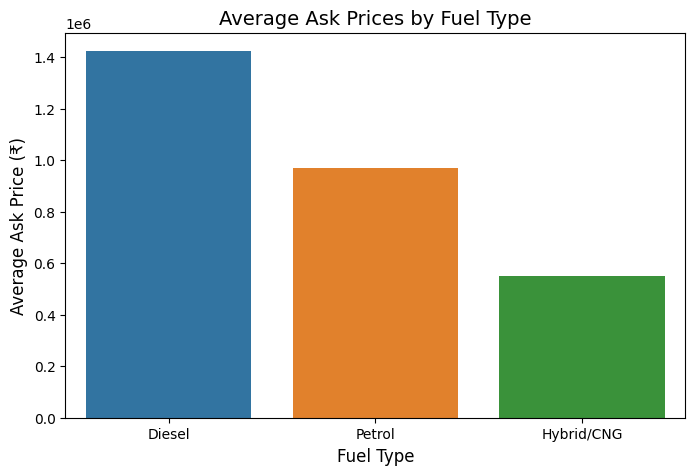

In [23]:
# Group by fuel type and calculate average price
price_trends_by_fuel_type = (
    df.groupby('FuelType')['AskPrice']
    .mean()
    .sort_values(ascending=False)
    .reset_index()
)

# Create a bar plot for price trends by fuel type
plt.figure(figsize=(8, 5))
sns.barplot(
    data=price_trends_by_fuel_type, 
    x='FuelType', 
    y='AskPrice'
)
plt.title('Average Ask Prices by Fuel Type', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Average Ask Price (₹)', fontsize=12)

plt.show()

There is a large difference between average asking prices for these three FuelTypes, so I will keep this feature. Surprisingly, Hybrid/CNG is lowest average AskPrice even as Hybrid cars are quite expensive. However, Compressed Natural Gas (CNG) vehicles can be quite inexpensive, and appear to make up a more significant portion of the dataset than more expensive Hybrid cards.

### Plot of the AskPrice vs Year by Transmission Type

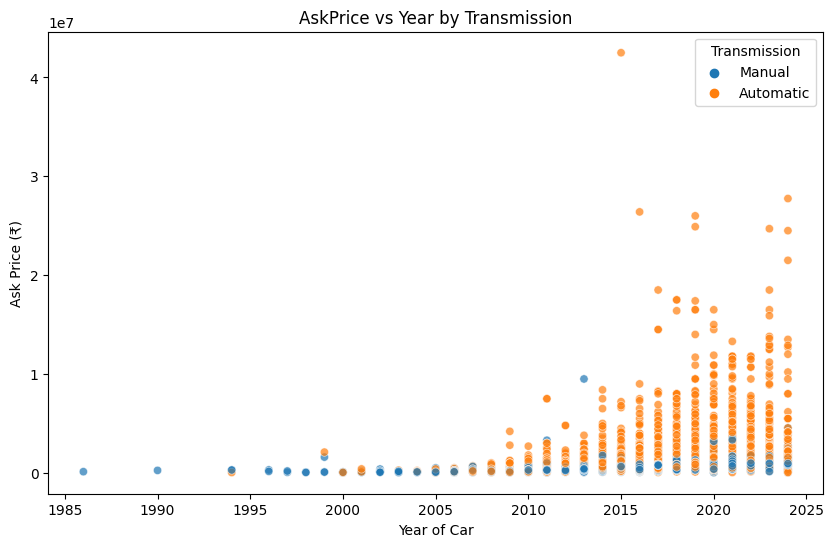

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Year', y='AskPrice', hue='Transmission', alpha=0.7)
plt.title('AskPrice vs Year by Transmission')
plt.xlabel('Year of Car')
plt.ylabel('Ask Price (₹)')
plt.legend(title='Transmission')
plt.show()

It can be observed that cars with Automatic transmissions tend to have a higher asking price than those with Manual transmissions.

### Plot the AskPrice vs kmDriven by Fuel Type

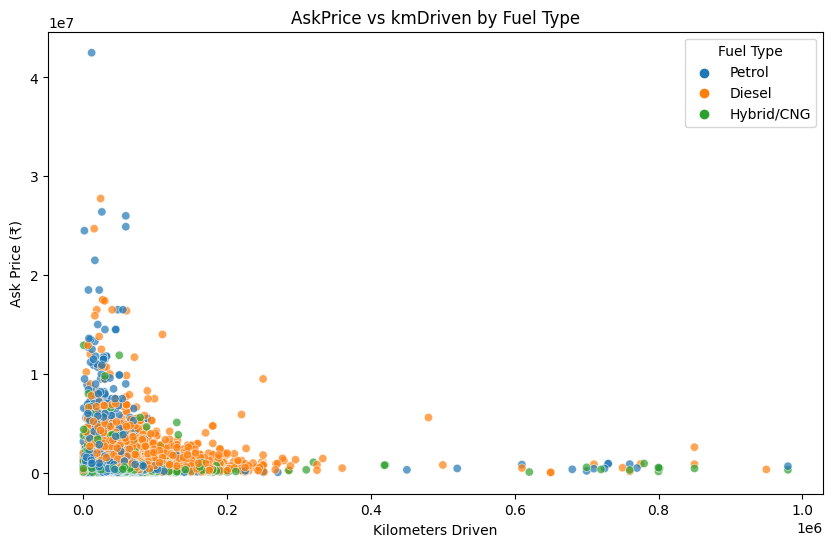

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='kmDriven', y='AskPrice', hue='FuelType', alpha=0.7)
plt.title('AskPrice vs kmDriven by Fuel Type')
plt.xlabel('Kilometers Driven')
plt.ylabel('Ask Price (₹)')
plt.legend(title='Fuel Type')
plt.show()

Fuel type is separated into various regions on the this graph.

### Plot the Distribution of AskPrice

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


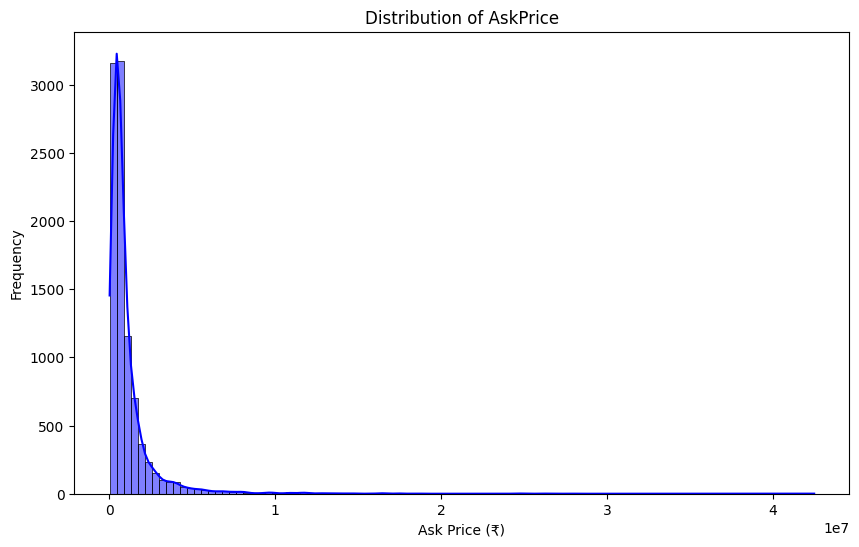

In [26]:
plt.figure(figsize=(10, 6))
sns.histplot(df['AskPrice'], bins=100, kde=True, color='blue')
plt.title('Distribution of AskPrice')
plt.xlabel('Ask Price (₹)')
plt.ylabel('Frequency')
plt.show()

Asking Price is heavily weighted as one would expect. Relatively few luxury cars skew the graph.

### Plot of the Average Asking Price for each Brand

Just for fun, let's see the average asking price for each Brand.

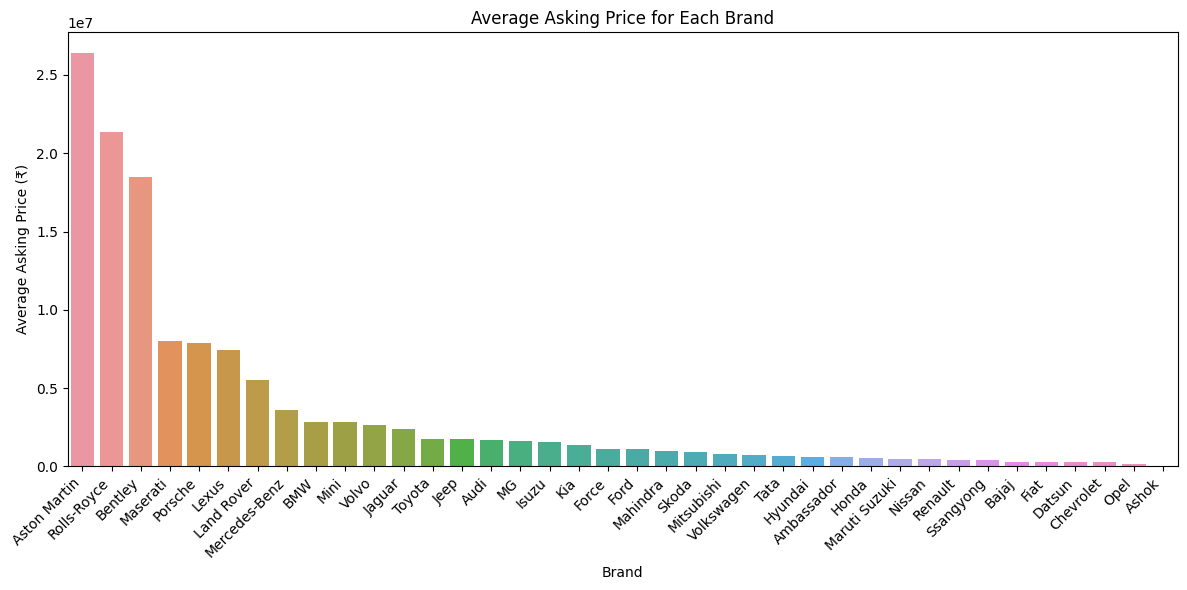

In [27]:
# Calculate the average asking price for each brand
brand_avg_price_summary = df.groupby('Brand')['AskPrice'].mean().reset_index()

# Sort the data for better visualization
brand_avg_price_summary = brand_avg_price_summary.sort_values(by='AskPrice', ascending=False)

# Create a seaborn bar plot for the average asking price by brand
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_avg_price_summary, x='Brand', y='AskPrice')
plt.title('Average Asking Price for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Average Asking Price (₹)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

I can see that a vast majority of car brands have an average AskPrice that is relatively low. Only a few brands have large AskPrices.

### Total Asking Price for each Brand

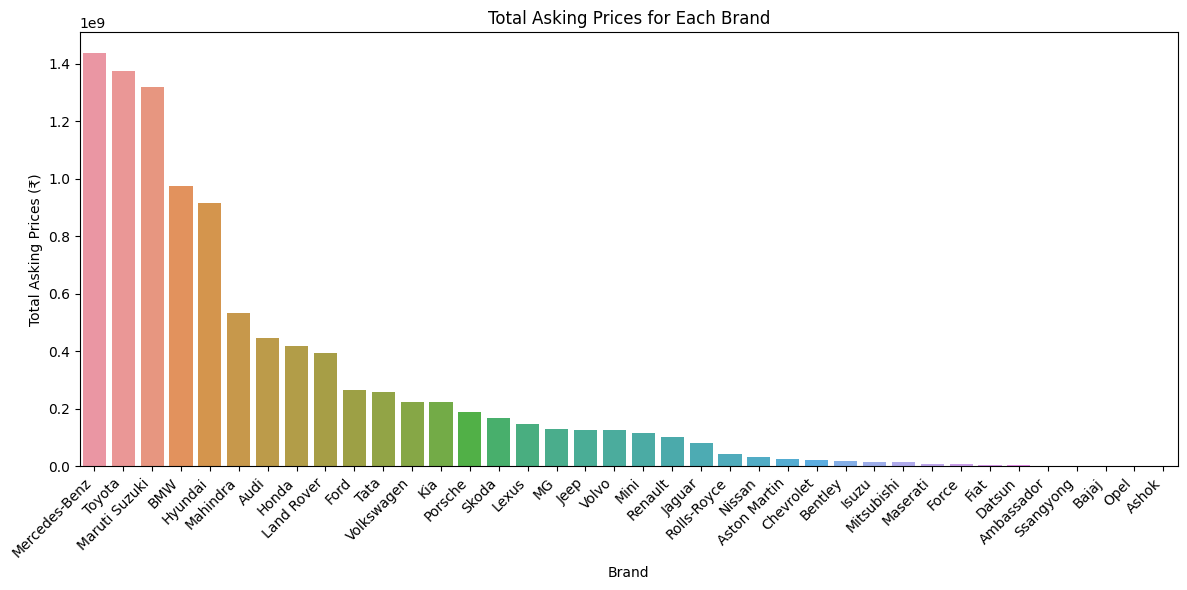

In [28]:
# Recalculate the total AskPrice by Brand
brand_price_summary = df.groupby('Brand')['AskPrice'].sum().reset_index()

# Sort the data for better visualization
brand_price_summary = brand_price_summary.sort_values(by='AskPrice', ascending=False)

# Create a seaborn bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_price_summary, x='Brand', y='AskPrice')
plt.title('Total Asking Prices for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Total Asking Prices (₹)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

This graph shows the "market share" of each brand in the dataset. Mercedes-Benz, Toyota, and Maruti Suzuki are the clear leaders, followed by BMW, and Hyundai.

### Total Units Sold of each Brand

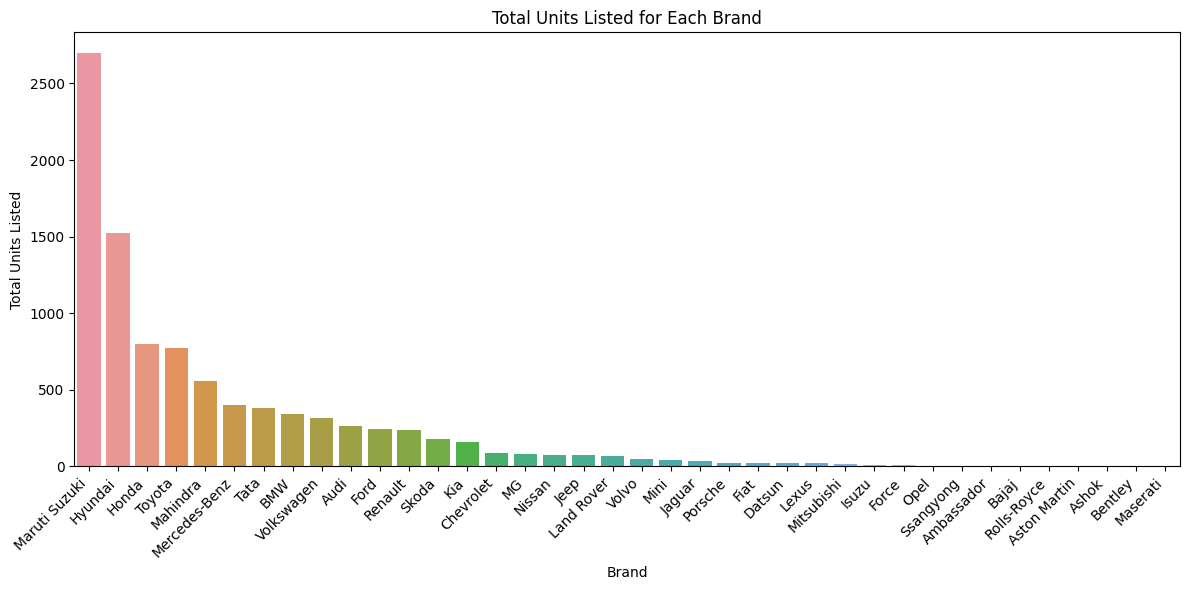

In [29]:
# Count the total units sold (assuming each row represents one unit sold)
brand_units_summary = df['Brand'].value_counts().reset_index()
brand_units_summary.columns = ['Brand', 'TotalUnitsSold']

# Sort the data for better visualization
brand_units_summary = brand_units_summary.sort_values(by='TotalUnitsSold', ascending=False)

# Create a seaborn bar plot for total units sold by brand
plt.figure(figsize=(12, 6))
sns.barplot(data=brand_units_summary, x='Brand', y='TotalUnitsSold')
plt.title('Total Units Listed for Each Brand')
plt.xlabel('Brand')
plt.ylabel('Total Units Listed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Maruti Suzuki and Hyundai are the clear leaders in number of cars listed by brand.

### Scatter Plot of kmDriven vs AskPrice

Let's look at a few scatter plots to check and see if this data is linear. I can also check visually for outliers at the same time.

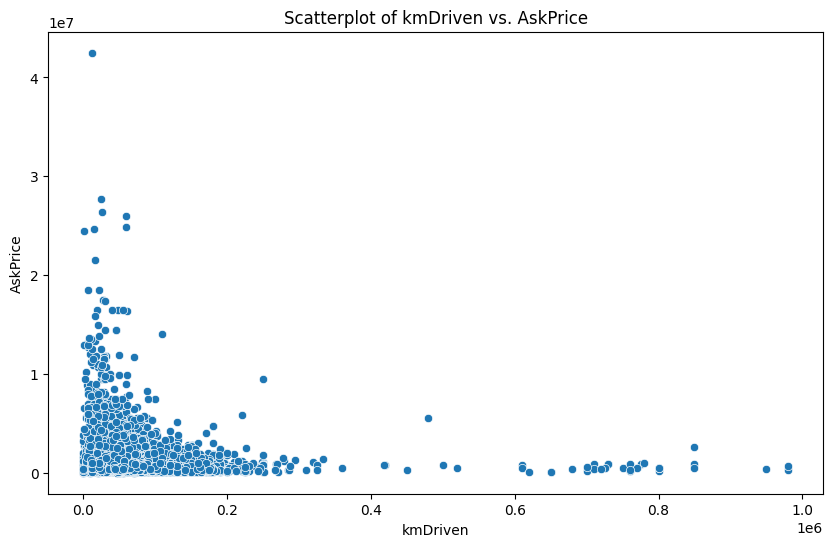

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot to identify outliers in 'kmDriven' vs. 'AskPrice'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['kmDriven'], y=df['AskPrice'])
plt.title('Scatterplot of kmDriven vs. AskPrice')
plt.show()

Outliers are clearly visible on both axes.

## Removing Outliers

I would like to remove some outliers.

The dataset currently has 9535 rows.

In [31]:
from scipy.stats import zscore

# Calculate Z-Scores
df['Z-Score'] = zscore(df['AskPrice'])

# Filter out outliers with |Z-Score| > 3
df = df[np.abs(df['Z-Score']) <= 3]

# Drop the 'Z-Score' column.
df = df.drop(columns=['Z-Score'])

In [32]:
df.shape

(9373, 8)

9373 rows left after outlier removal.

In [33]:
print(f'Percentage of rows dropped as Outliers: {100 * (9535 - 9373) / 9535:.2f}%')

Percentage of rows dropped as Outliers: 1.70%


This percentage of removed rows is a bit high for the size of the dataset, but after testing, the removal of outliers mades a significant difference in the resulting RMSE of the models.

## Linear Regression Approximation

I will try a linear regression as a starting point, even though the data so far suggest non-linear data.

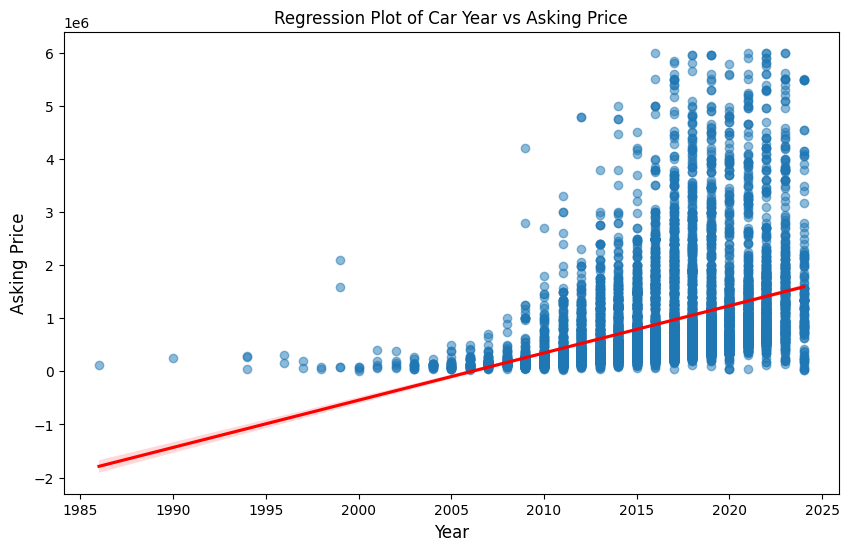

In [34]:
# Regression plot with a linear regression line
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Year', y='AskPrice', scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
plt.title('Regression Plot of Car Year vs Asking Price')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Asking Price', fontsize=12)
plt.show()

This data is certainly not linear. I will use more plots to better understand the data.

### Use PairPlot to see Relationships between the Numerical Features and the Asking Price

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


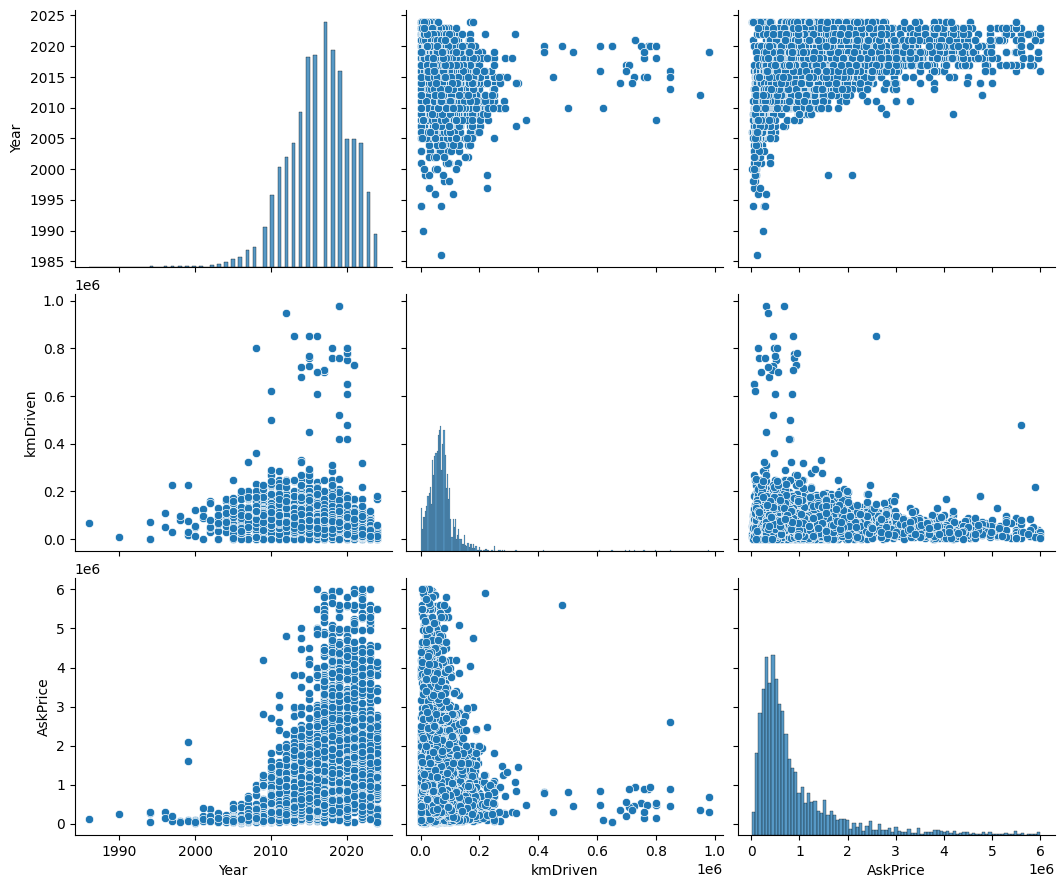

In [35]:
# Select numerical features for pairplot
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Pairplot of numerical features including the target
sns.pairplot(df, vars=numerical_features, y_vars=['AskPrice'], height=3, aspect=1.2)
plt.show()

There do appear to be relationships between these numerical features. Let's see if we can do better than this.

## Encoding Features

Now I need to encode some of the features. First, I will separate numerical and categorical columns.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9373 entries, 0 to 9581
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9373 non-null   object
 1   model         9373 non-null   object
 2   Year          9373 non-null   int64 
 3   kmDriven      9373 non-null   int64 
 4   Transmission  9373 non-null   object
 5   Owner         9373 non-null   object
 6   FuelType      9373 non-null   object
 7   AskPrice      9373 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 659.0+ KB


Define the numerical features.

In [37]:
numerical_features = ['Year', 'kmDriven', 'AskPrice', 'model_encoded',
                      'Brand_encoded', 'km_per_year', 'brand_model_interaction']  
categorical_features = ['Transmission', 'FuelType', 'Owner']

Define the X and y variables.

In [38]:
X = df.drop(columns=['AskPrice'])  # Replace 'AskPrice' with your target column
y = df['AskPrice']  # Replace 'AskPrice' with your target column

Now that there is X and y data, I would like to see the Mutual Information for the current features, including the encoded 'model' and 'Brand'. There are many steps to come first, however.

### Split the dataset into train and test data

**Do Before Splitting:**
1. ✓ Cleaning (missing values, outliers).
2. ✓ Irrelevant feature removal.

**Do After Splitting:**
1. One-Hot Encoding.
2. Target encoding.
3. Feature engineering.
4. Feature selection.
5. Scaling.

In [39]:
from sklearn.model_selection import train_test_split
# Split the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=0)

### One-Hot Encoding for Low-Cardinality Categorical Features

In [40]:
columns = X_train.columns

In [41]:
from sklearn.preprocessing import OneHotEncoder

# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Fit and transform the training data
X_train_encoded = encoder.fit_transform(X_train[categorical_features])

# Get the actual column names from the encoder
columns = encoder.get_feature_names_out(categorical_features)

# Convert the encoded data back to a DataFrame
X_train_encoded = pd.DataFrame(X_train_encoded, columns=columns)

# Repeat for the test data
X_test_encoded = encoder.transform(X_test[categorical_features])
X_test_encoded = pd.DataFrame(X_test_encoded, columns=columns)


Re-start indexes.

In [42]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Combine dataframes.

In [43]:
# Combine the DataFrames using an outer join
X_train = pd.concat([X_train, X_train_encoded], axis=1, join='outer')
X_test = pd.concat([X_test, X_test_encoded], axis=1, join='outer')

Drop text-based columns.

In [44]:
X_train.drop(columns=['Transmission', 'Owner', 'FuelType'], inplace=True)
X_test.drop(columns=['Transmission', 'Owner', 'FuelType'], inplace=True)

In [45]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7498 entries, 0 to 7497
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Brand                   7498 non-null   object 
 1   model                   7498 non-null   object 
 2   Year                    7498 non-null   int64  
 3   kmDriven                7498 non-null   int64  
 4   Transmission_Automatic  7498 non-null   float64
 5   Transmission_Manual     7498 non-null   float64
 6   FuelType_Diesel         7498 non-null   float64
 7   FuelType_Hybrid/CNG     7498 non-null   float64
 8   FuelType_Petrol         7498 non-null   float64
 9   Owner_first             7498 non-null   float64
 10  Owner_second            7498 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 644.5+ KB


### Target Encoding 

The 'model' and 'Brand' features have very high cardinality in a relatively small dataset. For this reason, I will use Target Encoding on these features.

In [46]:
# Define a function for target encoding with smoothing
def target_encode(train, test, feature, target, smoothing=10):
    """
    Performs target encoding on a categorical feature with smoothing.
    
    Args:
        train (pd.DataFrame): Training data.
        test (pd.DataFrame): Testing data.
        feature (str): Categorical feature to be target encoded.
        target (str): Target variable in the training data.
        smoothing (int): Smoothing factor to balance category mean with global mean.
    
    Returns:
        pd.Series, pd.Series: The target encoded feature for training and testing.
    """
    # Calculate global mean of the target
    global_mean = train[target].mean()
    
    # Calculate the mean and count for each category
    agg = train.groupby(feature)[target].agg(['mean', 'count'])
    mean = agg['mean']
    count = agg['count']
    
    # Apply smoothing formula
    smoothed_mean = (count * mean + smoothing * global_mean) / (count + smoothing)
    
    # Map the smoothed means to training and testing sets
    train_encoded = train[feature].map(smoothed_mean)
    test_encoded = test[feature].map(smoothed_mean)
    
    # Fill NaN in test_encoded with the global mean
    test_encoded = test_encoded.fillna(global_mean)
    
    return train_encoded, test_encoded

# Ensure 'AskPrice' is numeric in the training data
X_train['AskPrice'] = y_train  # Add target column temporarily to X_train if not included

# Apply target encoding to the 'model' feature
X_train['model_encoded'], X_test['model_encoded'] = target_encode(
    train=X_train, 
    test=X_test, 
    feature='model', 
    target='AskPrice', 
    smoothing=10
)

# Apply target encoding to the 'Brand' feature
X_train['Brand_encoded'], X_test['Brand_encoded'] = target_encode(
    train=X_train, 
    test=X_test, 
    feature='Brand', 
    target='AskPrice', 
    smoothing=10
)

# Drop the original 'model' and 'Brand' columns
X_train = X_train.drop(columns=['model', 'Brand', 'AskPrice'])
X_test = X_test.drop(columns=['model', 'Brand'])

## Feature Engineering

Make some Interaction Features.

Year * Brand_encoded

kmDriven / Year

In [47]:
# Ensure 'AskPrice' is numeric in the training data if not already
X_train['AskPrice'] = y_train

# Create interaction features for training data
X_train['km_per_year'] = X_train['kmDriven'] / (2025 - X_train['Year'])
X_train['brand_model_interaction'] = X_train['Brand_encoded'] * X_train['model_encoded']

# Create interaction features for test data
X_test['km_per_year'] = X_test['kmDriven'] / (2025 - X_test['Year'])
X_test['brand_model_interaction'] = X_test['Brand_encoded'] * X_test['model_encoded']

# Remove 'AskPrice' from training data after feature creation if it was added temporarily
X_train = X_train.drop(columns=['AskPrice'])

# Check correlation with the target in the training data
interaction_features = ['km_per_year', 'brand_model_interaction']
correlation = pd.concat([X_train[interaction_features], y_train], axis=1).corr()
print(correlation)

                         km_per_year  brand_model_interaction  AskPrice
km_per_year                 1.000000                 0.010162  0.061524
brand_model_interaction     0.010162                 1.000000  0.775848
AskPrice                    0.061524                 0.775848  1.000000


## Feature Selection

### PairPlot of all Features

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

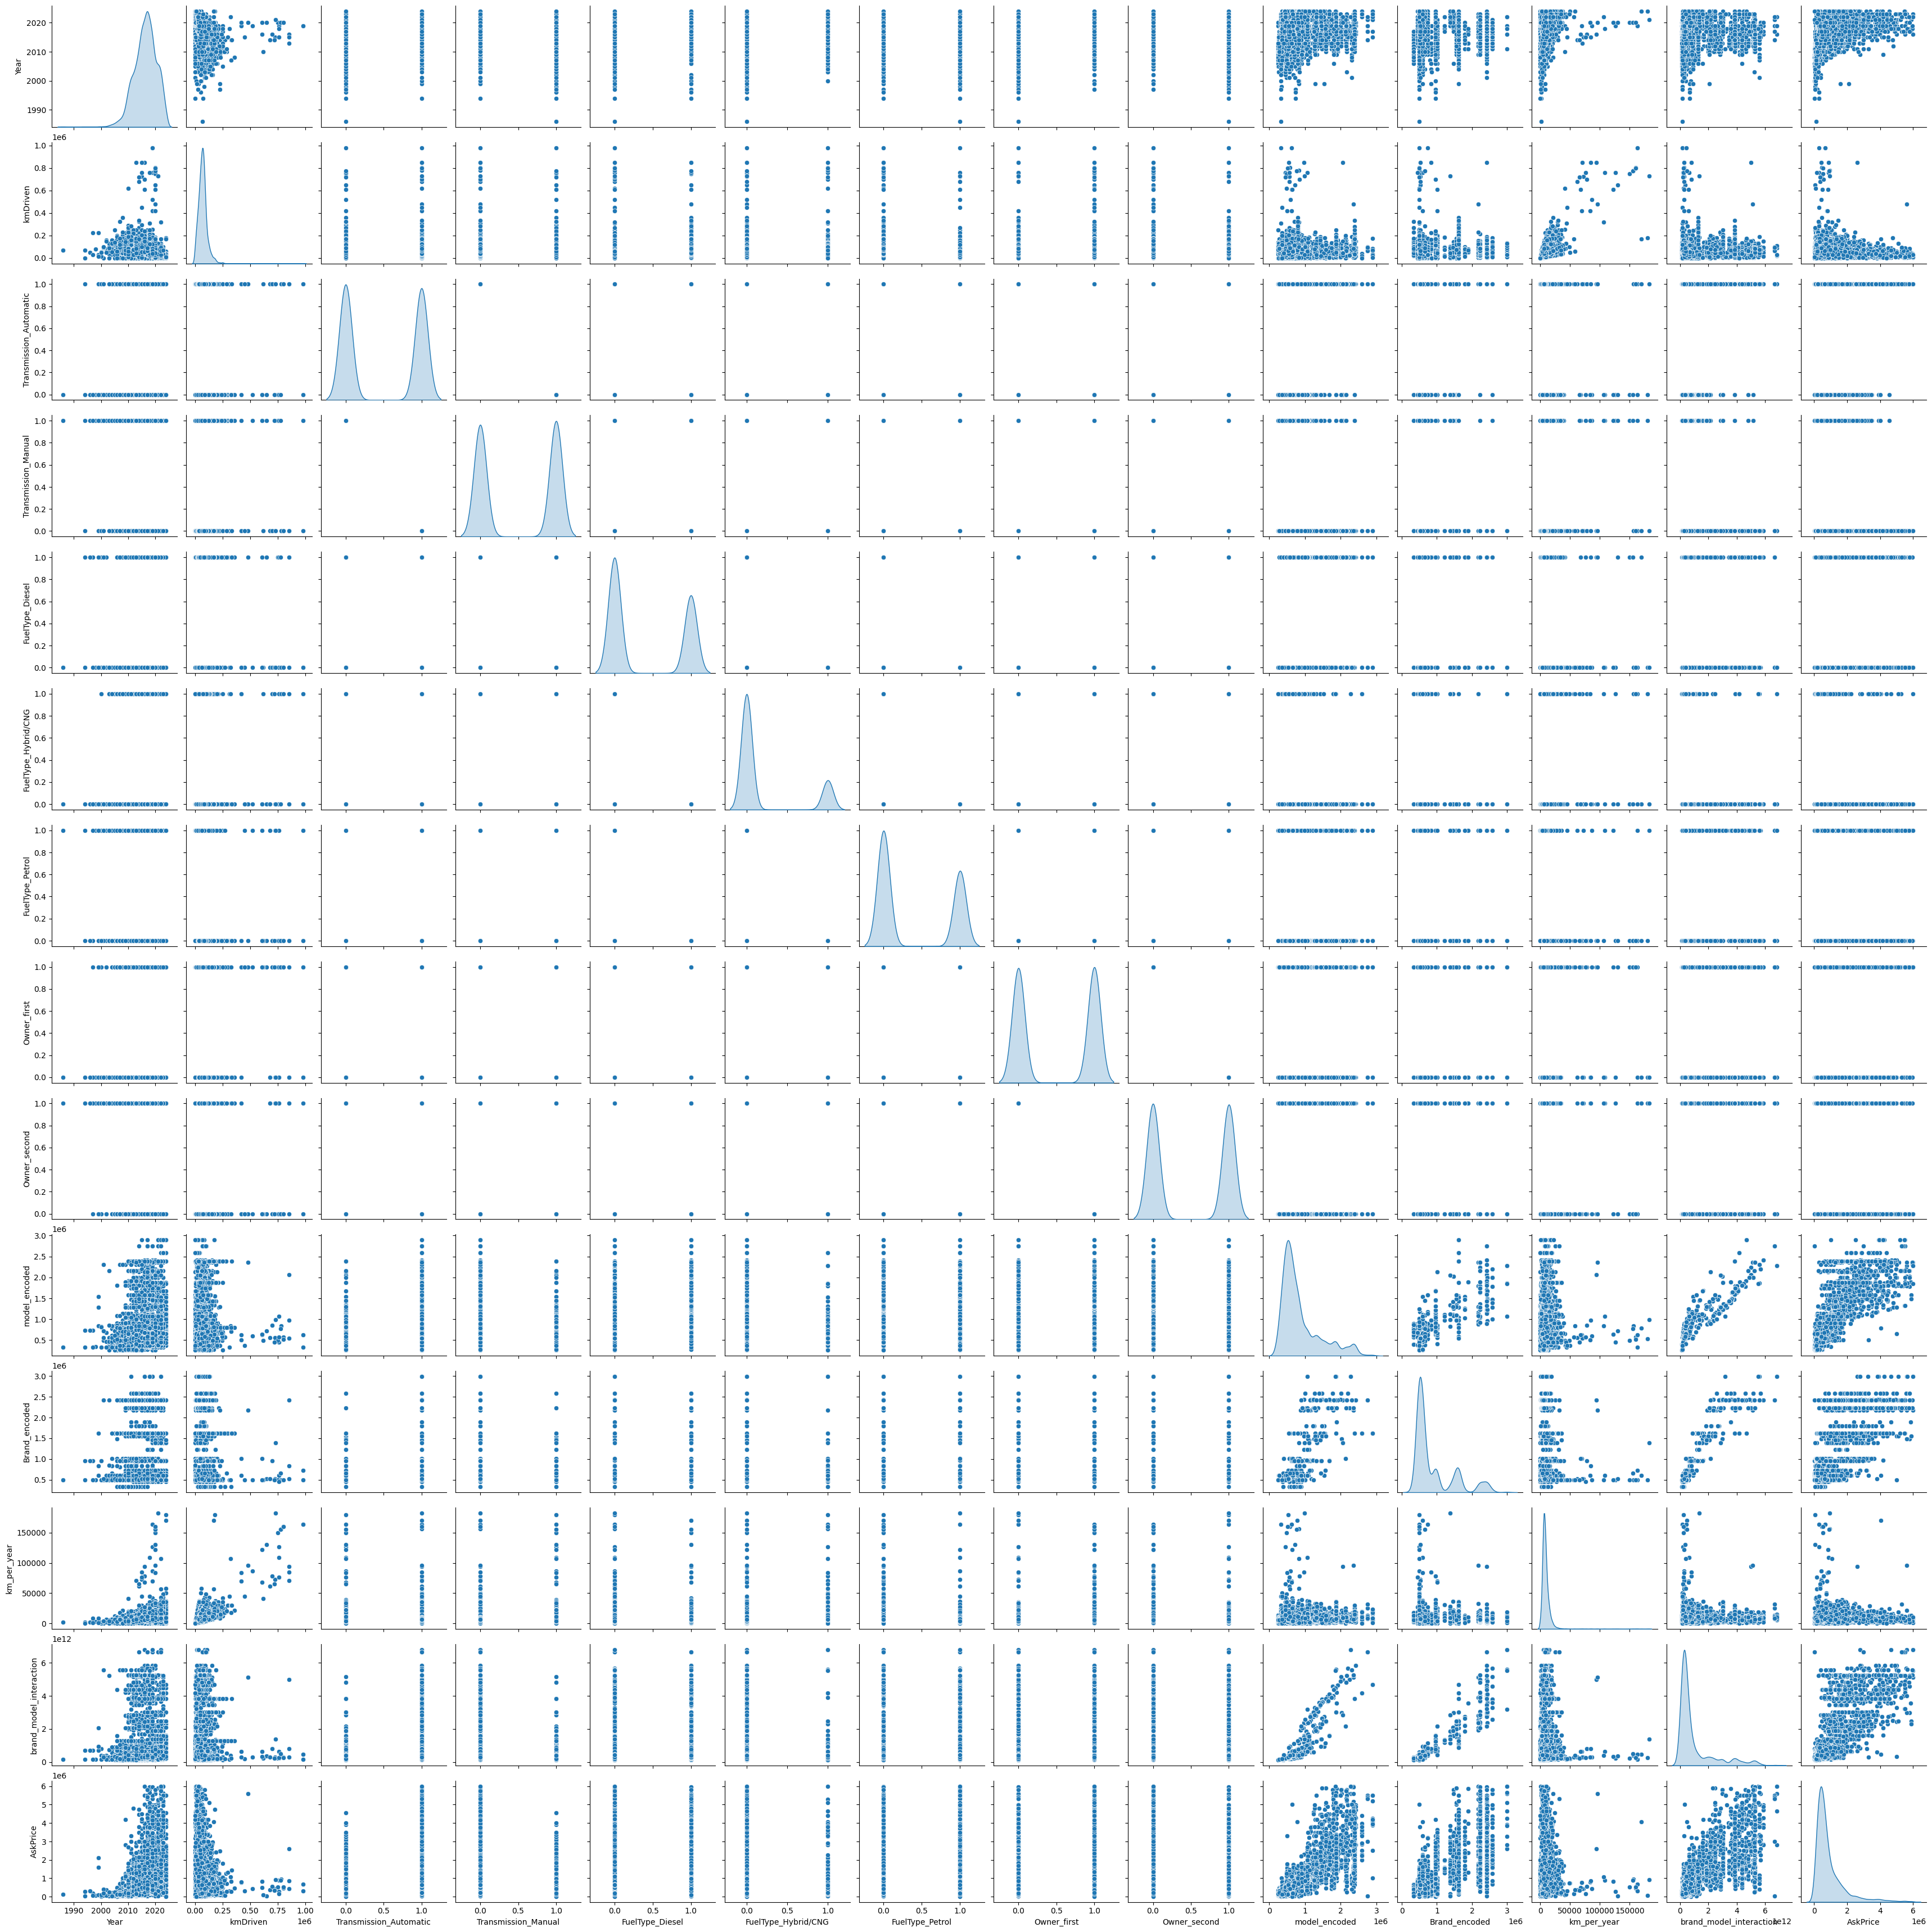

In [48]:
# Combine X_train and y_train
train_data = pd.concat([X_train, y_train], axis=1)

# Plot a pairplot
sns.pairplot(train_data, diag_kind='kde')
plt.show()

### Mutual Regression Graph

In [49]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(X_train, y_train)

# Convert results to a Pandas Series
mutual_info_series = pd.Series(mutual_info, index=X_train.columns)
mutual_info_series.sort_values(ascending=False, inplace=True)


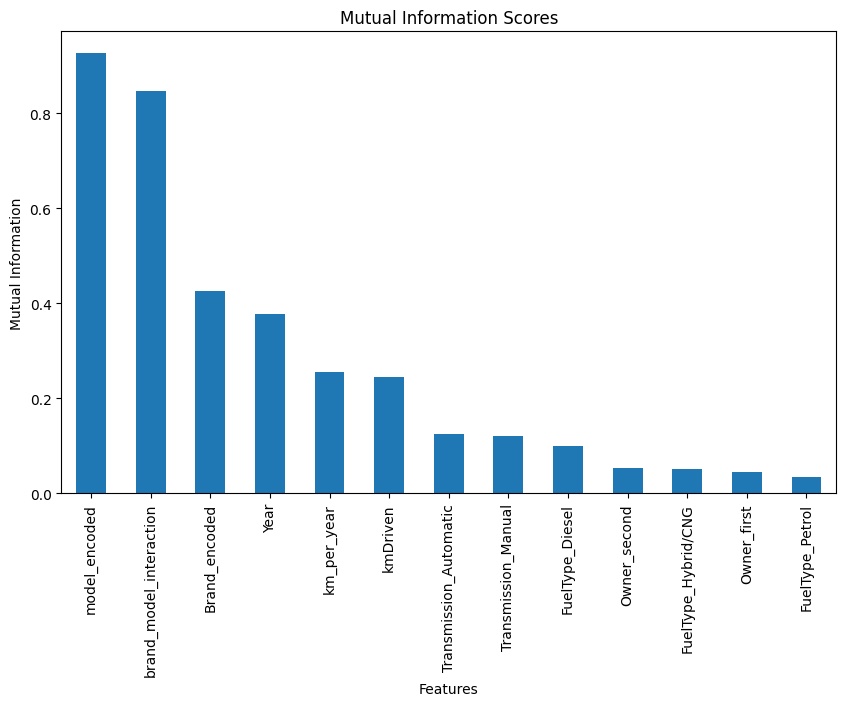

In [50]:
# Plot mutual information scores
plt.figure(figsize=(10, 6))
mutual_info_series.plot(kind='bar')
plt.title('Mutual Information Scores')
plt.xlabel('Features')
plt.ylabel('Mutual Information')
plt.show()


Now it can be seen that **model, and Brand*model appear to have the highest Mutual Information**, followed by **Brand, Year, km/yr, and kmDriven**. The remaining Mutual Information scores are relatively low, however, when models where tested without some or all of these features, RMSE scores were higher. Thereofore, these features will be used in the models.

### Scale the Data

X_train and X_test will now be Scaled to work with all models.

In [51]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training set and transform both the training and test sets
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)       # Transform test data

# Convert back to DataFrame to preserve column names and index
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

In [52]:
# Replace 'your_dataframe' with the name of your DataFrame
X_train.to_csv('X_train.csv', index=False)
y_train.to_csv('y_train.csv', index=False)


---

# <span style="color:#5E6997">Predict Car Asking Prices</span> <a class="anchor" id="predict"></a>

Before I start the models, I will define K-Folds so that all models are using the same folds of data.

In [53]:
from sklearn.model_selection import KFold

# Define a shared KFold cross-validator
kf = KFold(n_splits=5, shuffle=True, random_state=0)

## Decision Tree Model for the Dataset

I will start with a basic Decision Tree model.

In [54]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_squared_error

# Initialize the Decision Tree Regressor
dt_model = DecisionTreeRegressor(random_state=0)

# Define RMSE as the evaluation metric
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Perform cross-validation
cv_scores = cross_val_score(
    estimator=dt_model,
    X=X_train,
    y=y_train,
    scoring=rmse_scorer,
    cv=kf  # Use the shared KFold object
)

# Fit the model on the entire training set
dt_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_test = dt_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

# Display results
print(f"Cross-Validation RMSE Scores: {cv_scores}")
print(f"Mean RMSE (Cross-Validation): {cv_scores.mean():.3f}")
print(f"Standard Deviation of RMSE (Cross-Validation): {cv_scores.std():.3f}")
print(f"Test RMSE: {test_rmse:.3f}")

Cross-Validation RMSE Scores: [380708.42283117 366753.81942611 355939.04221355 421036.85526949
 421275.00683846]
Mean RMSE (Cross-Validation): 389142.629
Standard Deviation of RMSE (Cross-Validation): 27293.238
Test RMSE: 374524.724


Mean RMSE (Cross-Validation): 389,143

Standard Deviation of RMSE (Cross-Validation): 27,293

Test RMSE: 374,525

## Random Forest Regressor Model

Random Forest Base Model

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the RandomForestRegressor with default parameters
rf = RandomForestRegressor(random_state=0)

# Train the model on the training data
rf.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = rf.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display results
print(f"RMSE: {test_rmse:.3f}")


RMSE: 331747.568


Random Forest Base Model RMSE: 331,748

## Random Forest Fine-Tuned Model

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Define the RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

# Define hyperparameter distribution
param_dist = {
    'n_estimators': [10, 25, 50, 100],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [1.0, 'sqrt', 'log2']
}

# param_dist = {
#     'n_estimators': [100],
#     'max_depth': [20],
#     'min_samples_split': [2],
#     'min_samples_leaf': [1],
#     'max_features': [1.0]
# }

# Define the scoring metric
scoring = 'neg_mean_squared_error'  # Directly use sklearn's predefined scoring metric
rmse_scorer = make_scorer(mean_squared_error, squared=False)  # Custom RMSE scorer

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_dist,  # Pass the grid of hyperparameters
    scoring=scoring,
    cv=kf,  # Use the shared KFold
    verbose=0,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best parameters
best_params = grid_search.best_params_

# Check if the score is valid and convert to RMSE
best_cv_neg_mse = grid_search.best_score_  # Best score (negative MSE)
if best_cv_neg_mse < 0:  # Ensure it is negative
    best_cv_rmse = np.sqrt(-best_cv_neg_mse)  # Convert to RMSE
else:
    raise ValueError("Unexpected positive or NaN best_score_ in GridSearchCV.")

# Train a new model with the best parameters on the full training set
best_model = RandomForestRegressor(**best_params, random_state=0)
best_model.fit(X_train, y_train)

# Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display results
print("Best Parameters:", best_params)
print(f"Best Cross-Validation RMSE: {best_cv_rmse:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")

Best Parameters: {'max_depth': 20, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation RMSE: 300931.949
Test RMSE: 331813.208


Best Parameters: {'max_depth': 20, 'max_features': 1.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Best Cross-Validation RMSE: 300,932

Test RMSE: 331,813

## CatBoost Base Model

Base Case CatModel

In [57]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error

# Define the model with default hyperparameters
cat_model = CatBoostRegressor(random_seed=0, verbose=0)

# Train the model on the training data
cat_model.fit(X_train, y_train)

# Predict on the test set
y_pred = cat_model.predict(X_test)

# Compute RMSE on the test set
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Display results
print(f"RMSE: {rmse:.3f}")


RMSE: 313247.399


Base Case CatBoost Model RMSE: 313,247

## Fine-Tuned CatBoost Model

In [58]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

# Define the model
cat_model = CatBoostRegressor(
    random_seed=0,
    verbose=0
)

# Define the parameter grid
param_grid = {
    'iterations': [500, 1000],
    'learning_rate': [0.01, 0.03, 0.1],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0, 0.5, 1]
}

# param_grid = {
#     'iterations': [1000],
#     'learning_rate': [0.1],
#     'depth': [6],
#     'l2_leaf_reg': [1],
#     'bagging_temperature': [0]
# }

# Perform Grid Search
grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=kf,
    verbose=0,
    n_jobs=-1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Display best parameters and score
print("Best Parameters:", grid_search.best_params_)
best_rmse = (-grid_search.best_score_) ** 0.5
print(f"Best RMSE: {best_rmse:.3f}")

# Evaluate the best model on a test set
y_pred = grid_search.best_estimator_.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Test RMSE: {rmse:.3f}")


Best Parameters: {'bagging_temperature': 0, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
Best RMSE: 282365.582
Test RMSE: 299303.140


Best Parameters: {'bagging_temperature': 0, 'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

Best RMSE: 282,366

Test RMSE: 299,303

<div class="alert alert-block alert-info"> 💡 INSIGHT: This is the best result. Cross-Validation Mean RMSE = 282,056. Cross-Validation Standard Deviation of RMSE = 9,053. Test RMSE = 299,303.</div>

## XGBoost Base Model

In [59]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Initialize the XGBoost Regressor with default hyperparameters
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=0
)

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred_test = xgb_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

# Display results
print(f"RMSE: {test_rmse:.3f}")


RMSE: 319515.698


XGBoost Base Model RMSE: 319,516

## XGBoost Fine-Tuned Model

In [60]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the XGBoost Regressor
xgb_model = XGBRegressor(
    objective='reg:squarederror',  # Use squared error loss for regression
    random_state=0               
)

# Define parameter grid
param_grid = {
    'n_estimators': [200], # also tried [50, 100]
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [4, 6],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'gamma': [0, 1, 5],
    'reg_alpha': [0, 1, 10],
    'reg_lambda': [1, 10, 100]
}

# param_grid = {
#     'n_estimators': [200], # also tried [50, 100]
#     'learning_rate': [0.1],
#     'max_depth': [6],
#     'subsample': [0.8],
#     'colsample_bytree': [0.7],
#     'gamma': [0],
#     'reg_alpha': [0],
#     'reg_lambda': [1]
# }

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=kf,
    verbose=0,
    n_jobs=-1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Extract the best parameters and the best RMSE score
best_params = grid_search.best_params_
best_rmse = np.sqrt(-grid_search.best_score_)

# Train the model with the best parameters on the entire training set
best_model = grid_search.best_estimator_

# Evaluate on the test set
y_pred_test = best_model.predict(X_test)
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)

# Display results
print("Best Parameters:", best_params)
print(f"Best RMSE (Cross-Validation): {best_rmse:.3f}")
print(f"Test RMSE: {test_rmse:.3f}")


Best Parameters: {'colsample_bytree': 0.9, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'reg_alpha': 10, 'reg_lambda': 1, 'subsample': 0.9}
Best RMSE (Cross-Validation): 293136.009
Test RMSE: 309513.425


Best Parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}

Best RMSE (Cross-Validation): 294,915

Test RMSE: 310,854

## Tensorflow Base Model

In [61]:
import tensorflow as tf
import numpy as np
import random
import os

# Set random seeds for reproducibility
def set_reproducible(seed=0):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)

# Call the function to set the seed
set_reproducible()

# Define RMSE as a custom metric
def rmse(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))

# Define the model
def build_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),  # Define input shape explicitly
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)  # Single output for regression
    ])
    model.compile(optimizer='adam', loss='mse', metrics=[rmse])  # Use RMSE as the evaluation metric
    return model

val_scores = []
fold = 1

# Perform cross-validation
for train_idx, val_idx in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.values[train_idx], X_train.values[val_idx]
    y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

    model = build_model(input_dim=X_train.shape[1])
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, verbose=0)
    val_loss, val_rmse = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    val_scores.append(val_rmse)
    print(f"Fold {fold} - Validation RMSE: {val_rmse:.4f}")
    fold += 1

# Print average validation RMSE
print(f"Average Validation RMSE: {np.mean(val_scores):.4f}")

# Final model evaluation on test data
final_model = build_model(input_dim=X_train.shape[1])
final_model.fit(X_train.values, y_train, epochs=50, batch_size=32, verbose=0)
test_loss, test_rmse = final_model.evaluate(X_test.values, y_test, verbose=0)

print(f"Test RMSE: {test_rmse:.4f}")


Fold 1 - Validation RMSE: 437099.7500
Fold 2 - Validation RMSE: 436582.7188
Fold 3 - Validation RMSE: 438528.8438
Fold 4 - Validation RMSE: 449941.3750
Fold 5 - Validation RMSE: 431269.5312
Average Validation RMSE: 438684.4437
Test RMSE: 425501.6875


Average Validation RMSE: 438,684

Test RMSE: 425,502

## Fine-Tuned Tensorflow Model

In [62]:
import keras_tuner as kt

# Define RMSE as a custom metric with type casting
def rmse(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    return tf.sqrt(tf.reduce_mean(tf.square(y_true - y_pred)))


# Define a function to build the model with tunable hyperparameters
def build_tuned_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train.shape[1],)))

    # Tune the number of hidden layers and units per layer
    for i in range(hp.Int('num_layers', 1, 4)):  # 1 to 4 layers
        model.add(tf.keras.layers.Dense(
            units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32),
            activation='relu'
        ))
        model.add(tf.keras.layers.Dropout(
            rate=hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)
        ))

    # Output layer
    model.add(tf.keras.layers.Dense(1))  # Single output for regression

    # Compile the model with a tunable learning rate
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
        ),
        loss='mse',  # Use Mean Squared Error as the loss function
        metrics=[rmse]  # Use RMSE as the evaluation metric
    )
    return model

# Instantiate a tuner
tuner = kt.RandomSearch(
    build_tuned_model,
    objective=kt.Objective('val_rmse', direction='min'),  # Minimize validation RMSE
    max_trials=10,       # Number of models to try
    executions_per_trial=1,  # Number of runs per model
    directory='my_dir',
    project_name='ask_price_tuning_rmse'
)

# Search for the best hyperparameters
tuner.search(X_train.values, y_train, epochs=50, validation_split=0.2, verbose=0, batch_size=32)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of layers: {best_hps.get('num_layers')}
Units per layer: {[best_hps.get(f'units_{i}') for i in range(best_hps.get('num_layers'))]}
Dropout rates: {[best_hps.get(f'dropout_{i}') for i in range(best_hps.get('num_layers'))]}
Learning rate: {best_hps.get('learning_rate')}
""")

# Build and train the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)
best_model.fit(X_train.values, y_train, epochs=100, validation_split=0.2, batch_size=32, verbose=0)

# Evaluate on the test set
test_loss, test_rmse = best_model.evaluate(X_test.values, y_test, verbose=0)
print(f"Test RMSE: {test_rmse:.4f}")



The optimal number of layers: 2
Units per layer: [160, 192]
Dropout rates: [0.1, 0.5]
Learning rate: 0.004988286964378102

Test RMSE: 398974.5312


The optimal number of layers: 4

Units per layer: [256, 64, 128, 32]

Dropout rates: [0.4, 0.30000000000000004, 0.5, 0.1]

Learning rate: 0.0036103239402985906

Test RMSE: 390,682

---

# <span style="color:#5E6997">Conclusion</span> <a class="anchor" id="conclusion"></a>

In this notebook I systematically tackled the challenge of predicting used car prices in the Indian market by employing various machine learning models and leveraging an extensive dataset. The results from my analysis and modeling efforts provide key insights into the effectiveness of different approaches and the factors influencing car pricing.

#### Key Outcomes:
1. **Performance of Models**:
   - **Linear Regression**: While offering interpretability, its performance was limited due to the dataset's complexity and the presence of non-linear relationships.
   - **Decision Trees**: Provided better results by capturing non-linear patterns but was prone to overfitting, which impacted generalization.
   - **Random Forest**: Struck a balance between accuracy and robustness, handling feature interactions and reducing overfitting through ensemble learning.
   - **CatBoost Model**: This model was the **top performer** model with the results for this model are as follows: **Cross-Validation Mean RMSE = 282,056 (₹). Cross-Validation Standard Deviation of RMSE = 9,053 (₹). Test RMSE = 299,303 (₹)**.
   - **Gradient Boosting (e.g., XGBoost, LightGBM)**: This advanced model emerged as **runner up**, delivering superior predictive accuracy due to its ability to iteratively minimize errors and capture subtle data patterns.  
   - **Tensorflow**: Performed adequately, but more testing with this model may be needed for better results. I do think that having significantly more rows of data for training purposes would make a big difference in this model's performance.

2. **Feature Importance**:
   - Features like **Brand** (Target Encoded), **model** (Target Encoded), and **Brand*model** were consistently influential across models, highlighting their role in determining car prices.
   - **Year**, **kmDriven**, and **Km Driven per Year** further improved the RMSE of the model.
   - **Ownership History**, **Transmission Type**, and **Fuel Type** also contributed but with varying levels of importance.

3. **Challenges Addressed**:
   - Data preprocessing, including handling missing values, normalizing inconsistent formats, and feature engineering, played a critical role in enhancing model performance.
   - Insights into outliers and trends identified during exploratory data analysis guided model tuning and validation efforts.

4. **Model Comparison**:
   - **Gradient Boosting models** like XGBoost or LightGBM consistently outperformed other approaches in terms of predictive accuracy, as measured by metrics such as RMSE, MAE.
   - These models offer a practical balance between computational efficiency and prediction quality, making them the recommended choice for future applications.

#### Future Enhancements:
  - Gather significantly more data to include in this dataset.
  - Expanding the dataset with additional features like service history or accident records could improve model performance.
  - Exploring deep learning techniques or hybrid approaches could further refine predictions for complex datasets.


In conclusion, this notebook highlights the power of machine learning in understanding and predicting used car prices. Among the evaluated models, Gradient Boosting methods proved to be the most effective, offering actionable insights and practical applications for the Indian used car market.